In [49]:
#Import the neccessary libaries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Import your data, I imported a csv file from an open source 

df = pd.read_csv('..//Manchester_tickets_account//January_2021.csv', encoding=('latin1'))
pd.set_option('display.max_columns', None)

In [3]:
#Dataframe content
df.head()

,Issued,Paid,Status,Location,Ward,Ticket Destination,Zone Name,Outstanding,Offence
0,01/01/2021 08:20,-35.00,Pre-NtO Discount,Skerry Close,Ardwick,Affixed to vehicle,No Waiting At Any Time,0.00,1
1,01/01/2021 10:29,-35.00,Pre-NtO Discount,Water Street,(None),Affixed to vehicle,Restricted Area,0.00,1
2,01/01/2021 10:32,0.00,Pre-NtO Full Rate,Water Street,(None),Affixed to vehicle,Restricted Area,70.00,1
3,01/01/2021 10:33,-35.00,Pre-NtO Discount,Birchin Lane,Piccadilly,Affixed to vehicle,No Waiting At Any Time,0.00,1
4,01/01/2021 10:37,-35.00,Pre-NtO Discount,Water Street,(None),Affixed to vehicle,Restricted Area,0.00,1


In [4]:
#Data dimnesion
df.shape

(16064, 9)

In [5]:
#Checking for missing values
df.isnull().sum()

Issued                0
Paid                  0
Status                0
Location              0
Ward                  0
Ticket Destination    2
Zone Name             0
Outstanding           0
Offence               0
dtype: int64

In [6]:
#Replacing missing values with 0
df = df.fillna(0)

In [7]:
df.isnull().sum()

Issued                0
Paid                  0
Status                0
Location              0
Ward                  0
Ticket Destination    0
Zone Name             0
Outstanding           0
Offence               0
dtype: int64

In [18]:
#Overview of data types of each columns in the dataframe
df['Issued'] = pd.to_datetime(df['Issued'])
df.dtypes

Issued                datetime64[ns]
Paid                          object
Status                        object
Location                      object
Ward                          object
Ticket Destination            object
Zone Name                     object
Outstanding                   object
Offence                        int64
dtype: object

In [9]:
#Looking at the maximum of each column
df.max()

Issued          2021-12-01 23:59:00
Paid                          0.00
Status            Pre-NtO Full Rate
Location       upper lloyd st north
Ward                     Woodh Park
Zone Name                Taxi Stand
Outstanding                  70.00
Offence                          99
dtype: object

In [10]:
#Looking at the minimum of each column
df.min()

Issued              2021-01-01 08:20:00
Paid                           -130.00
Status                        Cancelled
Location                  ACKERS STREET
Ward                             (None)
Zone Name      20 mph speed restriction
Outstanding                     -12.00
Offence                               1
dtype: object

In [11]:
#Seeing the most popular locations - where people are charged
lo = pd.value_counts(df['Location']).head()
lo
#Oxford street, Oxford road and Portland Street are the most charged location

Oxford Street (Whitworth Street West To Chepstow Street)    2222
Oxford Road (Charles Street To Brancaster Road)             1685
Oxford Road (Nelson Street To Hathersage Road)               777
Portland Street (South-West Bound)                           555
Portland Street (North-East Bound)                           464
Name: Location, dtype: int64

<AxesSubplot:>

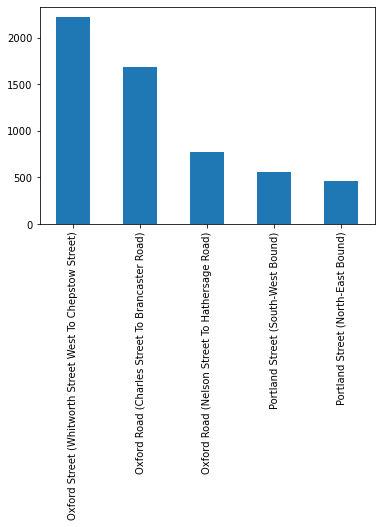

In [12]:
#Let's put in into a bar chart
lo.plot.bar()

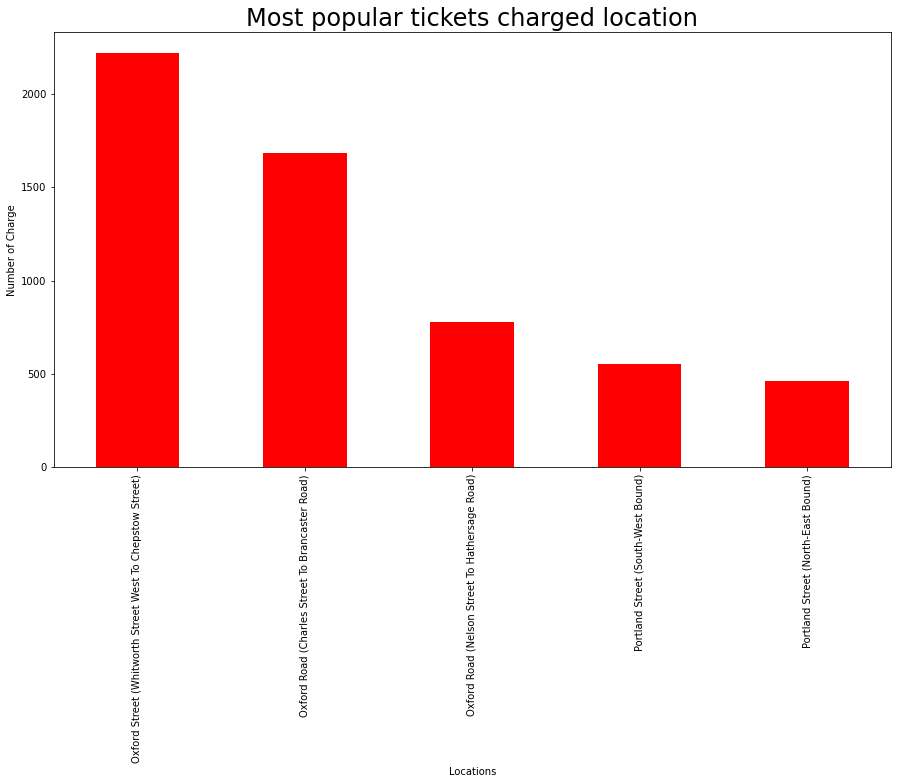

In [13]:
#give the bar chart some names and titles
lo.plot(kind='bar',figsize=(15,8), color='#ff0000')
plt.xlabel('Locations')
plt.ylabel('Number of Charge')
plt.title('Most popular tickets charged location', fontsize=24)
plt.show()

In [14]:
wa = pd.value_counts(df['Ward']).head()
wa

City Centre    5231
Deansgate      2260
Piccadilly     1313
Rusholme       1297
(None)         1292
Name: Ward, dtype: int64

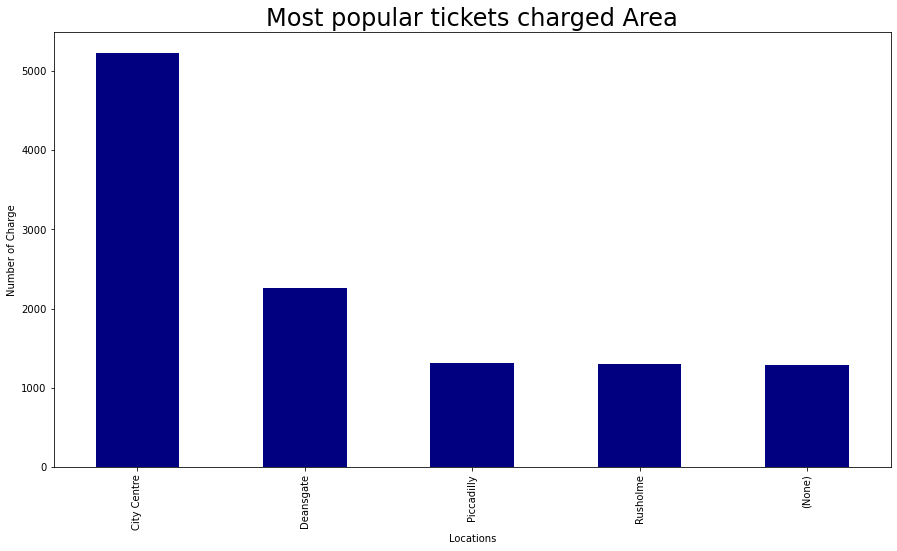

In [15]:
wa.plot(kind='bar',figsize=(15,8), color='#000080')
plt.xlabel('Locations')
plt.ylabel('Number of Charge')
plt.title('Most popular tickets charged Area', fontsize=24)
plt.show()

<AxesSubplot:>

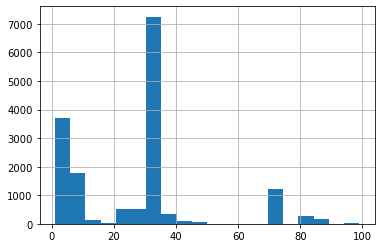

In [24]:
#Histogram: understand - distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right)
# To identify outliers — Extremely low or high values that do not fall near any other data points.
#Here the distribution is skewed to the right
df['Offence'].hist(bins=20)

AxesSubplot(0.125,0.125;0.775x0.755)


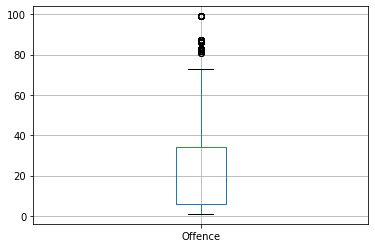

In [41]:
#Boxplot - statical summary, I think it only work with intergers
#Summary = minimum, First Quartile, Median (Second Quartile), Third Quartile, Maximum
print(df.boxplot(column='Offence'))

<AxesSubplot:xlabel='Offence'>

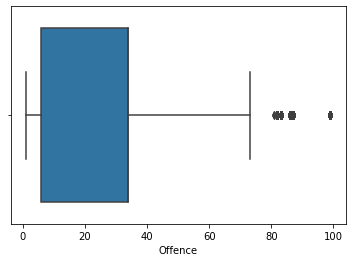

In [44]:
#Seaborn Boxplot
sns.boxplot(x=df['Offence'])

/Users/chuck_saenborisut/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


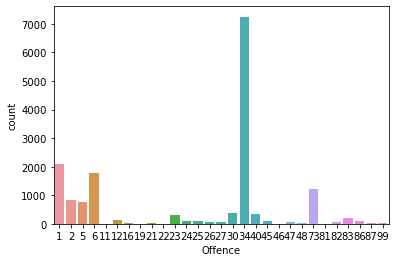

In [48]:
#Understading the Count Plots
sns.countplot(df.Offence)
fig_dims = (6, 4)